In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
from mplsoccer import Pitch, Sbopen

In [2]:
sb.competitions().sort_values('season_name', ascending = False).head(10)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363
59,44,107,United States of America,Major League Soccer,male,False,False,2023,2023-12-13T04:51:24.677007,2023-12-13T04:53:55.191129,2023-12-13T04:53:55.191129,2023-12-13T04:51:24.677007
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
56,7,235,France,Ligue 1,male,False,False,2022/2023,2023-12-11T12:07:17.819532,2023-12-11T12:13:49.169623,2023-12-11T12:13:49.169623,2023-12-11T12:07:17.819532
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
27,43,106,International,FIFA World Cup,male,False,True,2022,2023-11-05T04:23:26.649917,2023-11-21T15:37:11.589616,2023-11-21T15:37:11.589616,2023-11-05T04:23:26.649917
35,1238,108,India,Indian Super league,male,False,False,2021/2022,2023-03-31T02:14:09.896947,None,None,2023-03-31T02:14:09.896947
57,7,108,France,Ligue 1,male,False,False,2021/2022,2023-10-17T06:13:50.369573,2023-10-17T06:16:02.924274,2023-10-17T06:16:02.924274,2023-10-17T06:13:50.369573
23,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
36,11,90,Spain,La Liga,male,False,False,2020/2021,2023-11-15T10:25:53.245065,2023-11-15T10:29:14.475865,2023-11-15T10:29:14.475865,2023-11-15T10:25:53.245065


In [3]:
matches = sb.matches(competition_id=43, season_id=106)

In [4]:
matches['match_id']

0     3857256
1     3869151
2     3857257
3     3857258
4     3857288
       ...   
59    3857265
60    3857262
61    3857261
62    3857255
63    3857254
Name: match_id, Length: 64, dtype: int64

In [5]:
# Concatenate all dataframes

df_events = pd.DataFrame()

matches['match_id']


for i in range(len(matches['match_id'])):
    
    event = sb.events(match_id=matches['match_id'][i])
    
    df_events = pd.concat([df_events, event])

In [64]:
df_events.shape

(234652, 110)

In [70]:
event_passes = df_events[df_events['type'] == 'Pass']

## Adding the locations of the passes to calculate the average
event_passes['x_loc'] = event_passes['location'].apply(lambda x : x[0])

event_passes['y_loc'] = event_passes['location'].apply(lambda x : x[1])

event_passes['x_target_loc'] = event_passes['pass_end_location'].apply(lambda x : x[0])

event_passes['y_target_loc'] = event_passes['pass_end_location'].apply(lambda x : x[1])




df = event_passes.groupby(['player_id', 'player']).count()['team'].to_frame('total_passes')

df['completed'] = event_passes[event_passes['pass_outcome'] != 'Incomplete'].groupby(['player_id','player'])['team'].count()

df['length'] = event_passes.groupby(['player_id', 'player']).sum()['pass_length'].to_list()

df['x_loc'] = event_passes.groupby(['player_id', 'player']).mean()['x_loc']
df['x_target_loc'] = event_passes.groupby(['player_id', 'player']).mean()['x_target_loc']

df['y_loc'] = event_passes.groupby(['player_id', 'player']).mean()['y_loc']
df['y_target_loc'] = event_passes.groupby(['player_id', 'player']).mean()['y_target_loc']


<ipython-input-70-0e4035c11b65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_passes['x_loc'] = event_passes['location'].apply(lambda x : x[0])
<ipython-input-70-0e4035c11b65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_passes['y_loc'] = event_passes['location'].apply(lambda x : x[1])
<ipython-input-70-0e4035c11b65>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [71]:
df['pass_pct'] = df['completed'] / df['total_passes'] *100

In [74]:
# Select players with at least 100 passes attempted

df_top = df[df['total_passes'] > 100]

In [75]:
df_top.reset_index(inplace = True)

In [76]:
df_top.sort_values('pass_pct', ascending = False).head(15)

,player_id,player,total_passes,completed,length,x_loc,x_target_loc,y_loc,y_target_loc,pass_pct
120,6331.0,Leander Dendoncker,119,118.0,2427.887241,42.210924,42.756303,57.256303,52.957983,99.159664
51,4372.0,Marcos Aoás Corrêa,359,349.0,7140.084391,50.061838,55.272423,40.168245,36.401950,97.214485
19,3244.0,John Stones,450,435.0,9724.315534,43.212222,49.867778,51.082000,43.965111,96.666667
108,5642.0,Axel Witsel,176,170.0,3156.697493,54.443182,55.509659,32.146023,33.115341,96.590909
21,3295.0,Thiago Emiliano da Silva,335,322.0,7324.859391,44.809851,53.131940,33.200597,36.827463,96.119403
47,3959.0,Andreas Christensen,250,240.0,5246.328070,46.066000,51.648400,29.285600,32.424800,96.000000
177,16308.0,Leandro Daniel Paredes,240,230.0,4833.851413,55.660417,61.660417,35.829167,39.940000,95.833333
160,11748.0,Unai Simón Mendibil,158,151.0,3690.687543,12.978481,25.565823,40.412658,39.367722,95.569620
124,6765.0,Rodrigo Hernández Cascante,679,647.0,14975.813857,53.174227,58.282180,51.443594,47.643004,95.287187
253,133229.0,Ismael Koné,102,97.0,2444.096722,62.815686,63.010784,32.802941,32.062745,95.098039


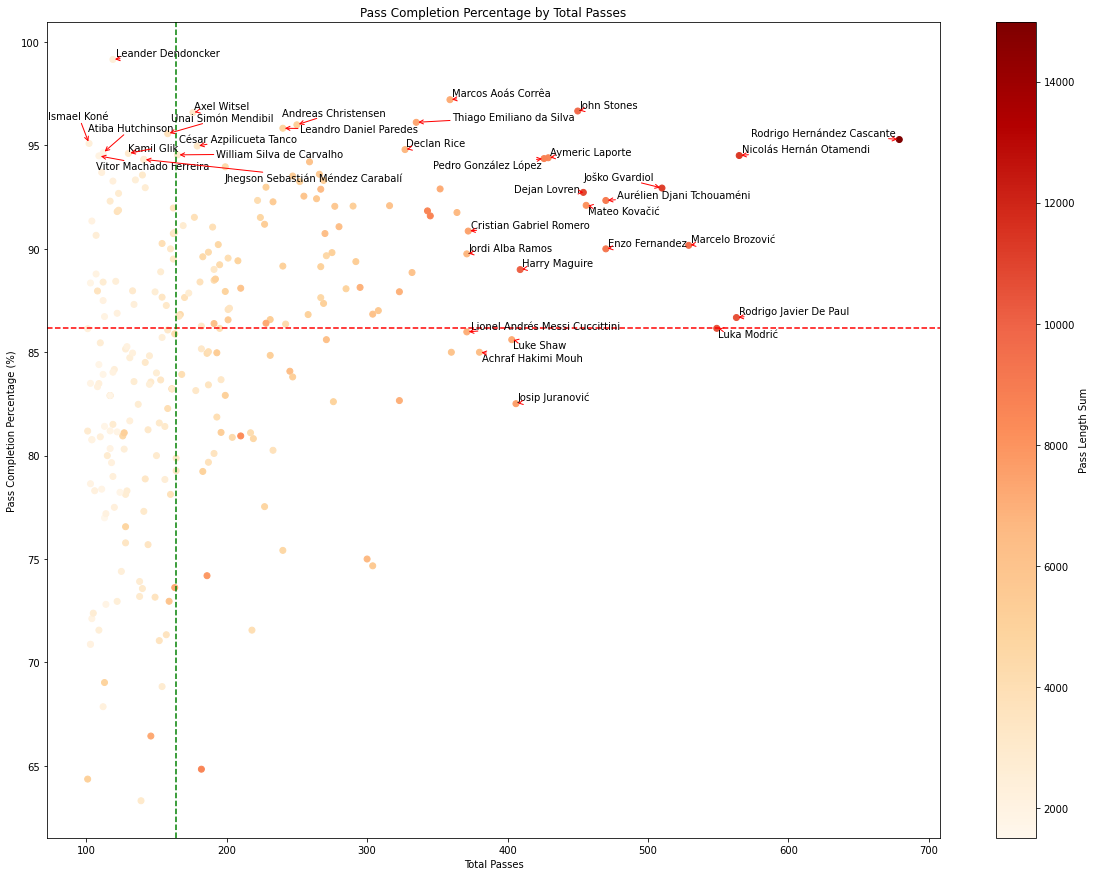

In [86]:
total_passes = df_top['total_passes']
pass_pct = df_top['pass_pct']
length = df_top['length']  # Sum length of the players' passes

# Set figure size
plt.figure(figsize=(20,15))

# Create scatter plot with 'length' as hue
# The larger the 'length', the darker the color
plt.scatter(total_passes, pass_pct, c=length, cmap='OrRd')

# Adding titles and labels
plt.title('Pass Completion Percentage by Total Passes')
plt.xlabel('Total Passes')
plt.ylabel('Pass Completion Percentage (%)')
plt.colorbar(label='Pass Length Sum')  # Add color bar to indicate what the colors represent

# Calculate medians
median_total_passes = np.median(total_passes)
median_pass_pct = np.median(pass_pct)

# Draw median lines
plt.axhline(y=median_pass_pct, color='r', linestyle='--', label=f'Median Pass %: {median_pass_pct}')
plt.axvline(x=median_total_passes, color='g', linestyle='--', label=f'Median Total Passes: {median_total_passes}')

texts = []
# Annotate the top 20 total_passes with player names
top_20_total_passes = df_top.sort_values('total_passes', ascending=False).head(20)
for index, row in top_20_total_passes.iterrows():
    texts.append(plt.text(row['total_passes'], row['pass_pct'], row['player'], ha='center'))

# Annotate the top 20 pass_pct with player names, avoiding duplicates
top_20_pass_pct = df_top.sort_values('pass_pct', ascending=False).head(20)
for index, row in top_20_pass_pct.iterrows():
    if row['player'] not in top_20_total_passes['player'].values:
        texts.append(plt.text(row['total_passes'], row['pass_pct'], row['player'], ha='center'))


# Automatically adjust the text positions
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Show plot
plt.show()

In [78]:
top_player_names = []

for i in range(len(texts)):
    name = texts[i].get_text()
    top_player_names.append(name)

In [79]:
df_top_players = df_top[df_top['player'].isin(top_player_names)]

In [80]:
df_top_players = df_top_players[(df_top_players['pass_pct'] >= 85) & (df_top_players['total_passes'] >= 300)]

149

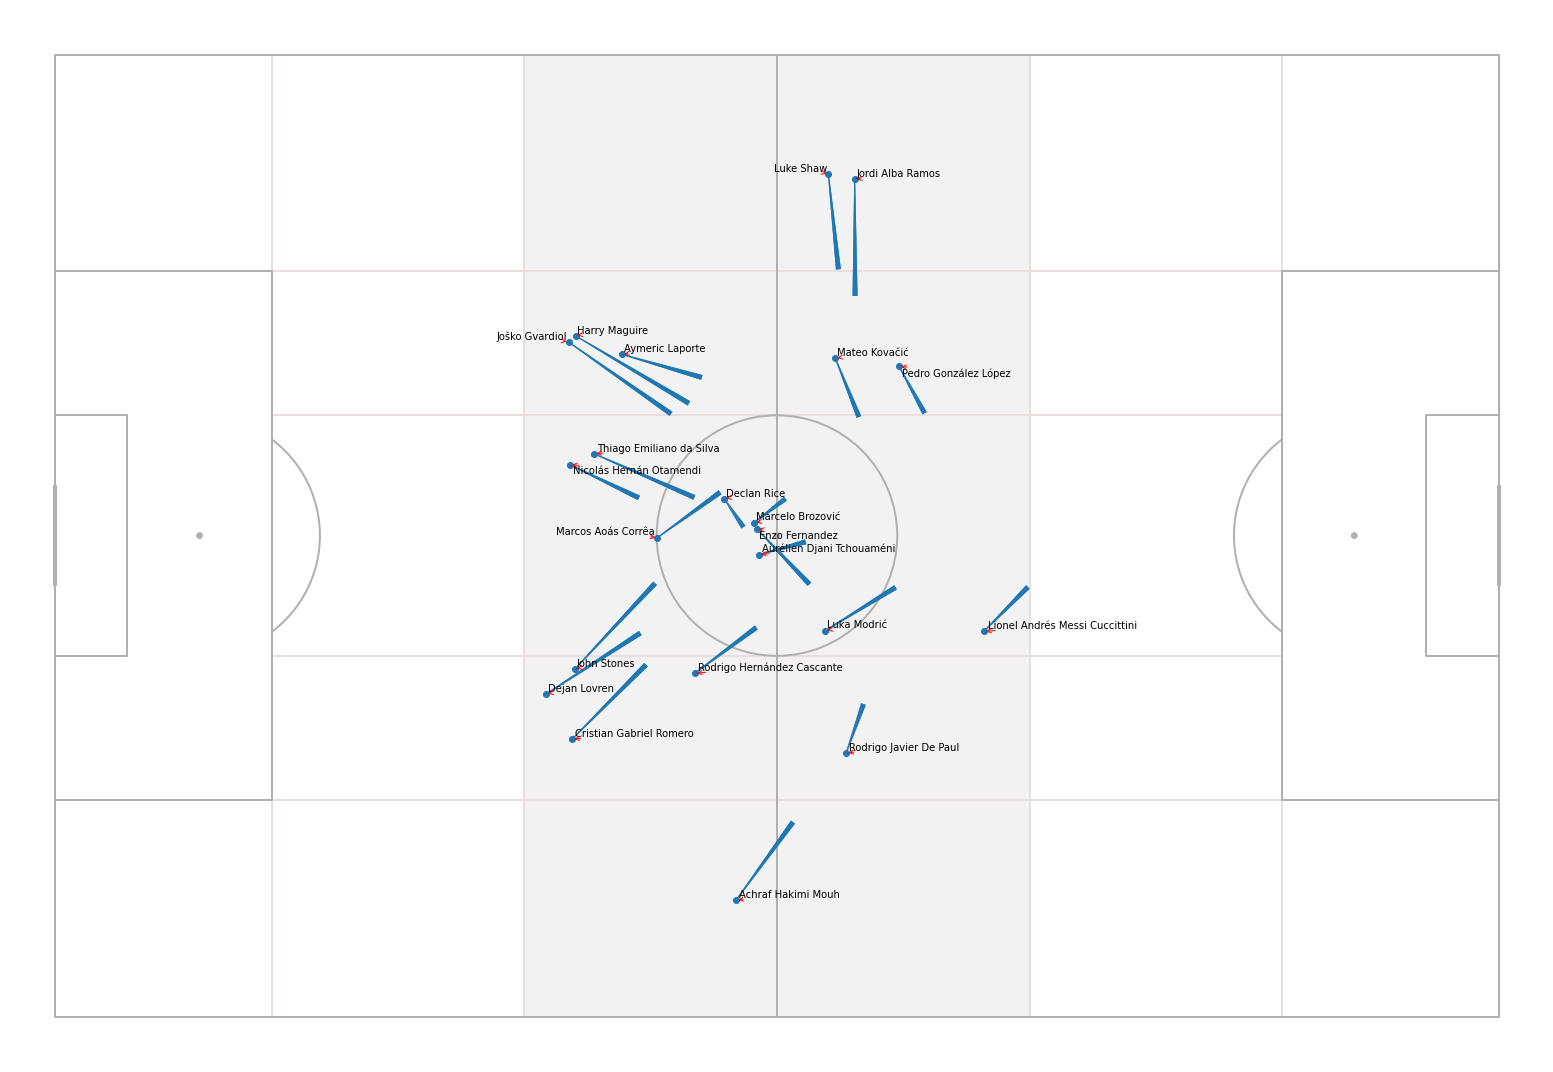

In [84]:
pitch = Pitch(positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2')
fig, ax = pitch.draw(figsize=(30,15))

pitch.scatter(x = df_top_players['x_loc'], y = df_top_players['y_loc'], ax = ax)
pitch.lines(xstart=df_top_players['x_loc'], ystart=df_top_players['y_loc'], xend=df_top_players['x_target_loc'], yend=df_top_players['y_target_loc'], ax=ax, comet = True)
texts = []
# Annotate the top 20 total_passes with player names
for index, row in df_top_players.iterrows():
    texts.append(plt.text(row['x_loc'], row['y_loc'], row['player'], ha='center'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

## Summary

#### Limitations
1) This analysis aggregates all matches from the 2022 FIFA World Cup, therefore the more a team played, the more players they probably have in the top performing athletes in passing. However, it is important to see that long-term performance is really important during a tournament which becomes harder as the team progresses.

2) The direction of the passes are not taken into account, nor the pressure players had by the opposition players.

#### Key Findings

1) Rodrigo Hernández Cascante (Rodri - playing for Manchester City) has the highest number of passes and also the largest total length with a 95,29% passing percentage. This is an incredible performance even though the directions of the passes can't be seen. Also, Spain were knocked out in the round of 16 against Morocco, so Rodri could only play 4 matches (in comparison to the last 4 teams (Argentina, France, Croatia, Morocco) who played 7 games in total.

2) There are many players from Croatia in the top right corner of the plot which means these players passed more and more accurately than 50% of the players analyzed (players with more than 100 passes during the tournament). Gvardiol, Lovren, Kovacic, Brozovic, Modric are in the top right corner while Juranovic (right back, playing for Union Berlin - born in 1995) also played a lot of passes with a more than 80% success. He can be a good and fairly cheap fit for a passing team.

3) If we take a look at the average passing position and the end position of the passes, we can see that Messi plays in one of the highest position with a high passing percentage and his passes are progressive passes on average. We can also see that Rodrigo De Paul, Pedro Gonzalez (Pedri) and Kovacic are located in the half-spaces on average when passing.

4) 